###                       For simulating qubit design, gate-qubit coupling, resonator-qubit coupling
---Zhenhai

In [3]:
import numpy as np
from scipy.constants import e, hbar
import matplotlib.pyplot as plt

### define the units 

In [4]:
fF = 1e-15
aF = 1e-18
GHz = 1e9
MHz = 1e6
us = 1e-6

### the capacitance matrix got from simulation

In [129]:
C_qubit = 95*fF # the qubit capacitance 
C_qubitDrive_coupling = 0.68*fF # the coupling capacitance between qubit and the drive line (gate/charge line)
Z_ext = 50 # the impedance seen by the qubit

In [130]:
qubit_freq_list = np.linspace(4*GHz, 10*GHz, 101)


#### relaxation(Q factor) due to coupling to continuous EM environment

In [132]:
Q_EM = C_qubit / (2*np.pi*qubit_freq_list) / C_qubitDrive_coupling**2 / Z_ext

#### relaxation(Q factor) due to the intrinsic loss

In [121]:
Q_int = 0.2 * 1e6 # estimate from the bare resonator measurement

#### relaxation(Q factor) due to the Purcell effect

In [133]:
Q_res_load = 10000 # loaded quality factor of the readout resonator
g_res_qubit = 2*np.pi * 50*MHz # the couping strength between resonator and qubit
wr = 2 * np.pi * 6.3*GHz # the resonator frequency
gama = wr / Q_res_load
Q_Pur = 2*np.pi*qubit_freq_list * (2*np.pi*qubit_freq_list - wr)**2 / g_res_qubit**2 / gama
Q_Pur_high_order = 2*np.pi*qubit_freq_list * (2*np.pi*qubit_freq_list - 2*wr)**2 / np.sqrt(2) / g_res_qubit**2 / gama

#### Q loaded factor of the qubit

In [134]:
Q_loaded = 1.0 / (1/Q_EM + 1/Q_int + 1/Q_Pur + 1/Q_Pur_high_order)
T1 = Q_loaded / (2*np.pi*qubit_freq_list) /us

### plotting

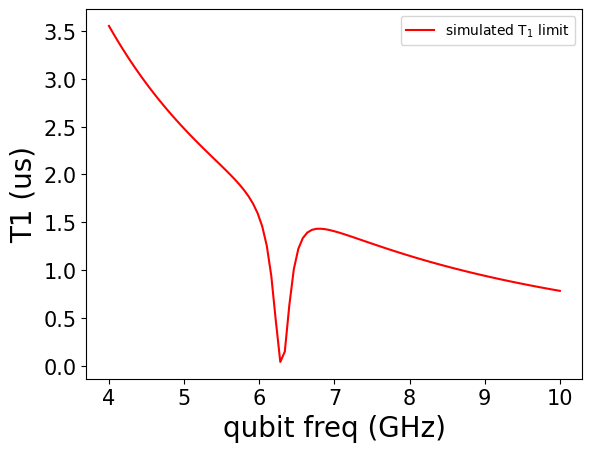

In [135]:
plt.figure()
plt.plot(qubit_freq_list/1e9, T1, 'r-', label="simulated T$_{1}$ limit")
plt.xlabel("qubit freq (GHz)", fontsize=20)
plt.ylabel("T1 (us)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()